In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# # Check if GPU is available
# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available and ready to use!")
# else:
#     print("GPU is not available. Please enable it in the runtime settings.")


GPU is not available. Please enable it in the runtime settings.


In [ ]:
# import tensorflow as tf

# # Check for GPU
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# # Use GPU for computation
# with tf.device('/GPU:0'):
#     a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
#     b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
#     c = tf.matmul(a, b)
#     print(c)


Num GPUs Available:  0
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [4]:
# tf.config.optimizer.set_jit(True)  # Enable XLA

In [6]:
df = pd.read_excel(r'C:\Users\USER\Desktop\HTU\First Semester 4rth Year\Applied Analytical Modelling\gold_futures.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement
0,2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up
1,2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up
2,2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up
3,2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up
4,2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down
...,...,...,...,...,...,...,...,...
1240,2024-12-10,2662.300049,2698.199951,2661.000000,2697.600098,2697.600098,437,Up
1241,2024-12-11,2701.800049,2733.800049,2693.100098,2733.800049,2733.800049,3387,Up
1242,2024-12-12,2725.100098,2725.100098,2677.399902,2687.500000,2687.500000,2365,Down
1243,2024-12-13,2688.199951,2689.300049,2647.899902,2656.000000,2656.000000,1125,Down


In [7]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Price Movement    0
dtype: int64

In [8]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1245,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,2022-06-25 04:44:31.807228928,1935.453574,1945.315985,1925.952770,1935.689395,1935.689395,4225.694779
min,2020-01-02 00:00:00,1469.300049,1484.000000,1452.099976,1477.300049,1477.300049,0.000000
25%,2021-03-30 00:00:00,1779.500000,1787.800049,1770.099976,1777.199951,1777.199951,74.000000
50%,2022-06-24 00:00:00,1869.300049,1876.000000,1862.599976,1868.300049,1868.300049,231.000000
75%,2023-09-21 00:00:00,1988.199951,1994.599976,1977.699951,1985.000000,1985.000000,645.000000
max,2024-12-16 00:00:00,2787.399902,2789.000000,2774.600098,2788.500000,2788.500000,251274.000000
std,NaN,260.426016,261.177932,259.766152,260.533468,260.533468,23181.283059


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1245 non-null   datetime64[ns]
 1   Open            1245 non-null   float64       
 2   High            1245 non-null   float64       
 3   Low             1245 non-null   float64       
 4   Close           1245 non-null   float64       
 5   Adj Close       1245 non-null   float64       
 6   Volume          1245 non-null   int64         
 7   Price Movement  1245 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 77.9+ KB


In [10]:
if 'Price Movement' in df.columns:
    le = LabelEncoder()
    df['Price Movement'] = le.fit_transform(df['Price Movement'])

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y%m%d').astype(int)

In [11]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [15]:
# Define the Generator model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='sigmoid')
    ])
    return model

# Define the Discriminator model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [16]:
# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model

In [17]:
# Function to train the GAN model with the given hyperparameters
def train_gan(hyperparams, training_data):
    epochs = hyperparams['epochs']
    batch_size = hyperparams['batch_size']
    input_dim = hyperparams['input_dim']
    learning_rate = hyperparams['learning_rate']
    
    output_dim = training_data.shape[1]
    
    # Initialize the models
    generator = build_generator(input_dim=input_dim, output_dim=output_dim)
    discriminator = build_discriminator(input_dim=output_dim)
    gan = build_gan(generator, discriminator)
    
    # Compile the models
    discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy')
    
    # Tracking losses for plotting
    d_losses = []
    g_losses = []

    # Training loop
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, training_data.shape[0], half_batch)
        real_data = training_data.iloc[idx].values
        noise = np.random.normal(0, 1, (half_batch, input_dim)).astype(np.float32)
        fake_data = generator.predict(noise).astype(np.float32)

        real_labels = np.ones((half_batch, 1), dtype=np.float32)
        fake_labels = np.zeros((half_batch, 1), dtype=np.float32)

        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, input_dim)).astype(np.float32)
        valid_labels = np.ones((batch_size, 1), dtype=np.float32)
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Store the losses for later analysis
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss[0]} | G Loss: {g_loss}")
    
    return generator, discriminator, d_losses, g_losses

In [18]:
# Hyperparameter configurations
hyperparameters = [
    {'epochs': 2000, 'batch_size': 256, 'input_dim': 50, 'learning_rate': 0.002},
    {'epochs': 2000, 'batch_size': 128, 'input_dim': 30, 'learning_rate': 0.001},
    {'epochs': 2000, 'batch_size': 64, 'input_dim': 20, 'learning_rate': 0.005},
    {'epochs': 2000, 'batch_size': 32, 'input_dim': 10, 'learning_rate': 0.003},
]

In [19]:
from tensorflow.keras import mixed_precision

# Enable mixed precision for faster computation on GPU
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)  # Changed set_policy to set_global_policy
print(f"Mixed precision enabled: {policy}")

Mixed precision enabled: <DTypePolicy "mixed_float16">


In [20]:
# Train multiple GANs with different hyperparameters
generators = []
discriminators = []
d_losses_all = []
g_losses_all = []

for hyperparams in hyperparameters:
    print(f"Training GAN with hyperparameters: {hyperparams}")
    generator, discriminator, d_losses, g_losses = train_gan(hyperparams, normalized_df)
    
    generators.append(generator)
    discriminators.append(discriminator)
    d_losses_all.append(d_losses)
    g_losses_all.append(g_losses)

Training GAN with hyperparameters: {'epochs': 2000, 'batch_size': 256, 'input_dim': 50, 'learning_rate': 0.002}


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0/2000 | D Loss: 0.6610626578330994 | G Loss: [array(0.6938275, dtype=float32), array(0.6938275, dtype=float32), array(0.5, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━

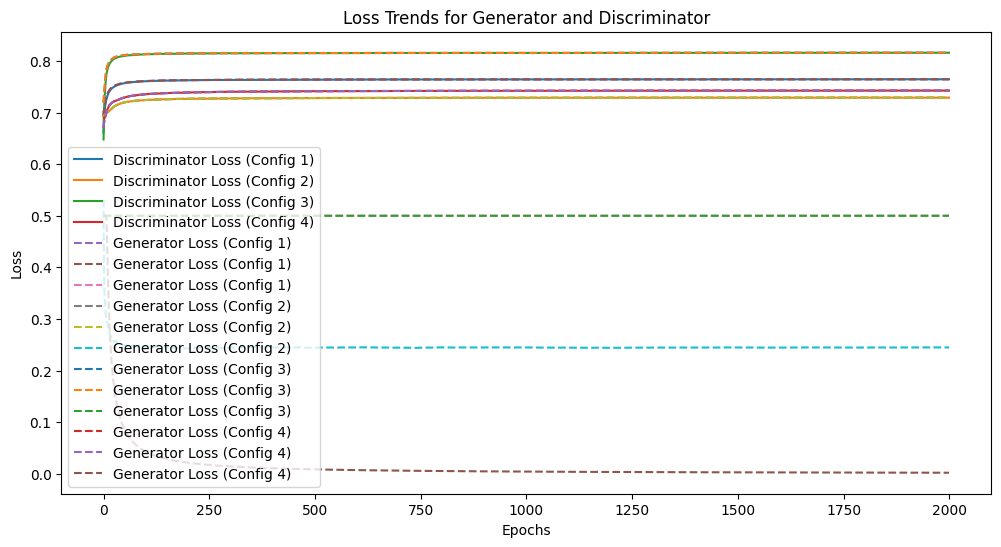

Config 1 - Discriminator Loss: 0.7644, Generator Loss: 0.6763
Config 1 - Min Discriminator Loss: 0.7644, Min Generator Loss: 0.5000
Config 2 - Discriminator Loss: 0.7288, Generator Loss: 0.5675
Config 2 - Min Discriminator Loss: 0.7288, Min Generator Loss: 0.2450
Config 3 - Discriminator Loss: 0.8158, Generator Loss: 0.7106
Config 3 - Min Discriminator Loss: 0.8158, Min Generator Loss: 0.5000
Config 4 - Discriminator Loss: 0.7425, Generator Loss: 0.4957
Config 4 - Min Discriminator Loss: 0.7425, Min Generator Loss: 0.0022


In [33]:
# Plot the loss trends for all GANs
plt.figure(figsize=(12, 6))
for i, d_losses in enumerate(d_losses_all):
    plt.plot(d_losses, label=f'Discriminator Loss (Config {i+1})')
for i, g_losses in enumerate(g_losses_all):
    plt.plot(g_losses, label=f'Generator Loss (Config {i+1})', linestyle='--')

plt.title('Loss Trends for Generator and Discriminator')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the loss trends for all GANs
for i, (d_losses, g_losses) in enumerate(zip(d_losses_all, g_losses_all)):
    last_d = d_losses[-1]
    last_g = g_losses[-1]
    
    avg_d_loss = (sum(last_d) / len(last_d)) if isinstance(last_d, list) else last_d
    avg_g_loss = (sum(last_g) / len(last_g)) if isinstance(last_g, list) else last_g
    
    min_d_loss = min(last_d) if isinstance(last_d, list) else last_d
    min_g_loss = min(last_g) if isinstance(last_g, list) else last_g
    
    print(f"Config {i+1} - Discriminator Loss: {avg_d_loss:.4f}, Generator Loss: {avg_g_loss:.4f}")
    print(f"Config {i+1} - Min Discriminator Loss: {min_d_loss:.4f}, Min Generator Loss: {min_g_loss:.4f}")

In [34]:
config_index = 1  # Index for config2 in the hyperparameters list
desired_samples = 10000
input_dim = hyperparameters[config_index]['input_dim']  # Retrieve input dimension from config2
generator_config2 = generators[config_index]  # Retrieve generator trained with config2

noise = np.random.normal(0, 1, (10000, input_dim))
synthetic_data = generator_config2.predict(noise)

synthetic_df = pd.DataFrame(synthetic_data)
synthetic_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.034241,0.000014,1.0,0.344971,1.0,0.043457,1.0,3.576279e-07,2.384186e-07,1.0
1,0.046722,0.000063,1.0,0.338867,1.0,0.052917,1.0,1.966953e-06,1.728535e-06,1.0
2,0.069763,0.000365,1.0,0.334473,1.0,0.070557,1.0,1.204014e-05,1.186132e-05,1.0
3,0.041138,0.000010,1.0,0.344727,1.0,0.048950,1.0,1.788139e-07,2.384186e-07,1.0
4,0.029541,0.000014,1.0,0.342529,1.0,0.039490,1.0,2.384186e-07,1.788139e-07,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.045349,0.000057,1.0,0.340820,1.0,0.052246,1.0,3.516674e-06,1.847744e-06,1.0
9996,0.041626,0.000070,1.0,0.340576,1.0,0.050598,1.0,1.490116e-06,1.013279e-06,1.0
9997,0.027161,0.000004,1.0,0.349854,1.0,0.038239,1.0,5.960464e-08,5.960464e-08,1.0
9998,0.049408,0.000039,1.0,0.338867,1.0,0.054077,1.0,6.556511e-07,7.748604e-07,1.0


In [35]:
# Revert numeric columns to original scale
synthetic_df = scaler.inverse_transform(synthetic_df)
synthetic_df = pd.DataFrame(synthetic_df)

synthetic_df

,0,1,2,3,4,5,6,7,8,9
0,1515.0,1483.0,2774.0,1930.0,2788.0,10920.0,1.0,2020.0,0.999512,31.0
1,1530.0,1485.0,2774.0,1922.0,2788.0,13296.0,1.0,2020.0,0.999512,31.0
2,1561.0,1485.0,2774.0,1916.0,2788.0,17728.0,1.0,2020.0,1.000000,31.0
3,1524.0,1483.0,2774.0,1930.0,2788.0,12296.0,1.0,2020.0,0.999512,31.0
4,1509.0,1483.0,2774.0,1926.0,2788.0,9920.0,1.0,2020.0,0.999512,31.0
...,...,...,...,...,...,...,...,...,...,...
9995,1529.0,1485.0,2774.0,1925.0,2788.0,13128.0,1.0,2020.0,0.999512,31.0
9996,1524.0,1485.0,2774.0,1923.0,2788.0,12712.0,1.0,2020.0,0.999512,31.0
9997,1505.0,1483.0,2774.0,1936.0,2788.0,9608.0,1.0,2020.0,0.999512,31.0
9998,1534.0,1483.0,2774.0,1922.0,2788.0,13592.0,1.0,2020.0,0.999512,31.0


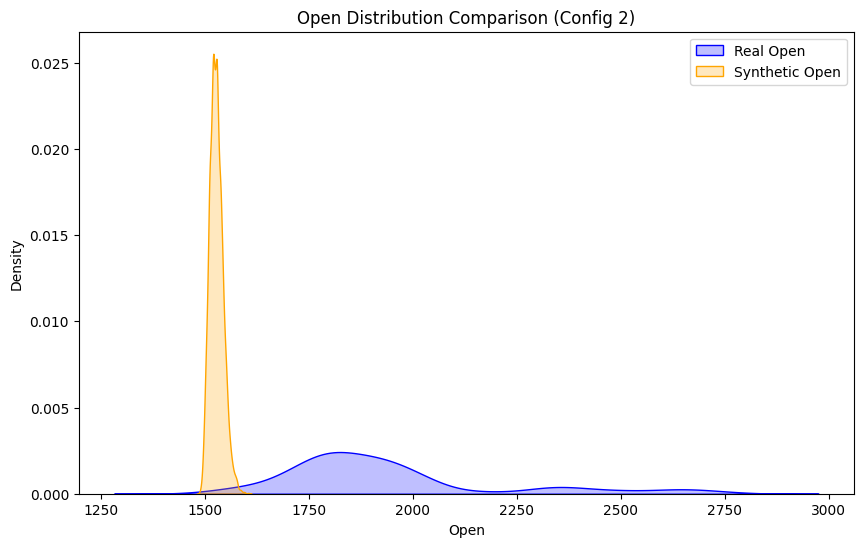

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Open | Real Mean: 1935.45, Real Std: 260.43 | Synthetic Mean: inf, Synthetic Std: 15.98


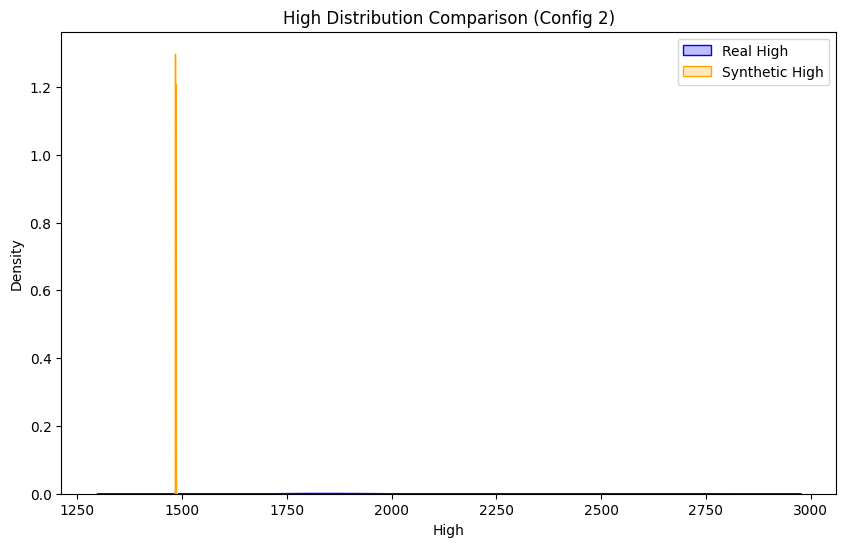

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


High | Real Mean: 1945.32, Real Std: 261.18 | Synthetic Mean: inf, Synthetic Std: 1.00


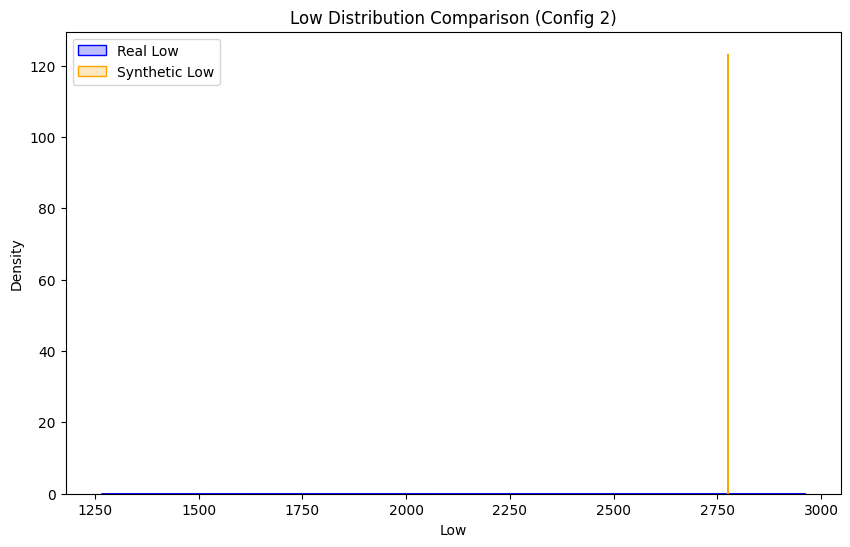

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Low | Real Mean: 1925.95, Real Std: 259.77 | Synthetic Mean: inf, Synthetic Std: 0.02


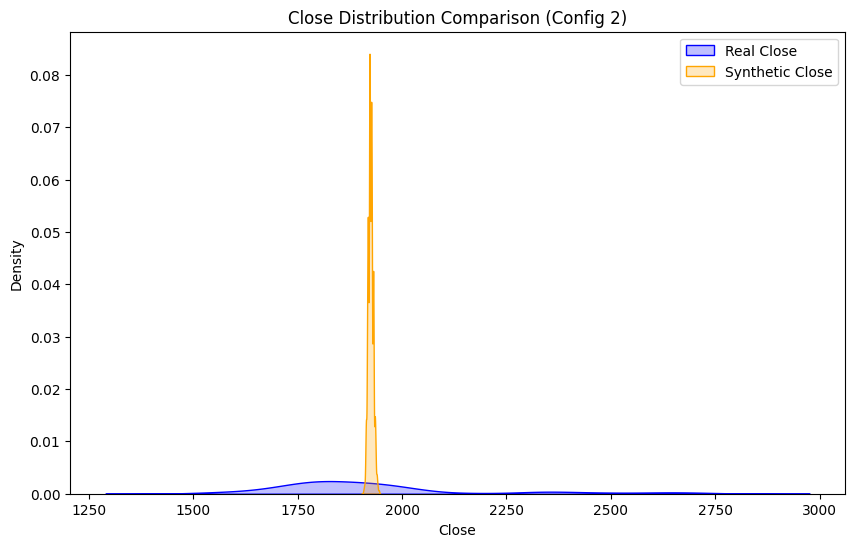

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Close | Real Mean: 1935.69, Real Std: 260.53 | Synthetic Mean: inf, Synthetic Std: 5.83


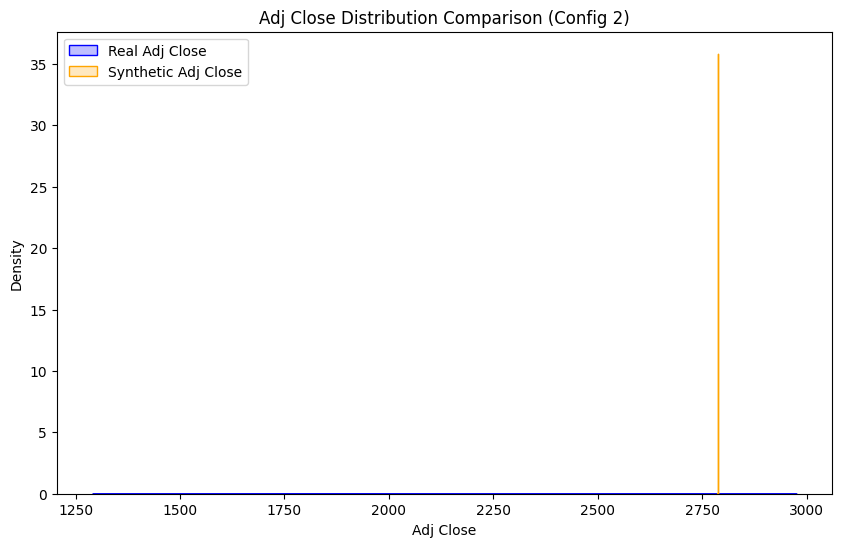

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Adj Close | Real Mean: 1935.69, Real Std: 260.53 | Synthetic Mean: inf, Synthetic Std: 0.07


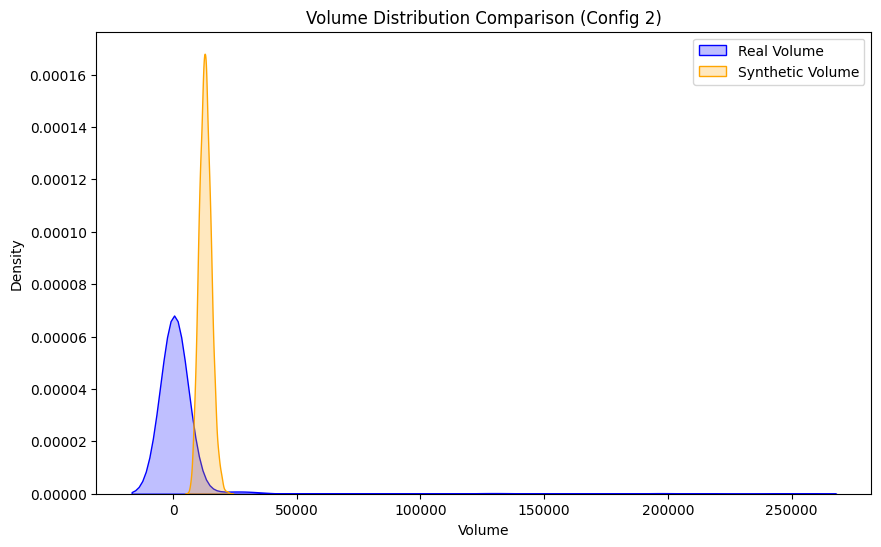

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Volume | Real Mean: 4225.69, Real Std: 23181.28 | Synthetic Mean: inf, Synthetic Std: inf


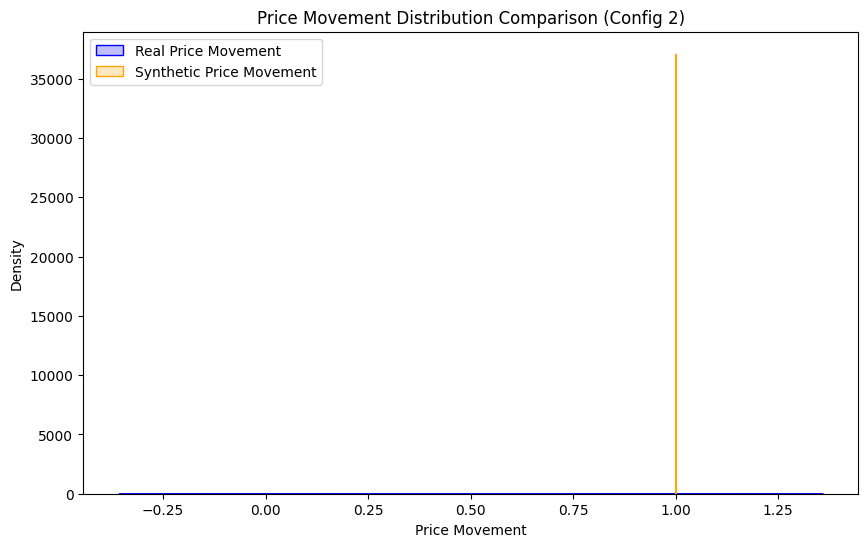

Price Movement | Real Mean: 0.55, Real Std: 0.50 | Synthetic Mean: 1.00, Synthetic Std: 0.00


C:\Users\USER\AppData\Local\Temp\ipykernel_9940\1193686699.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_df[column], label=f'Synthetic {column}', fill=True, color='orange')


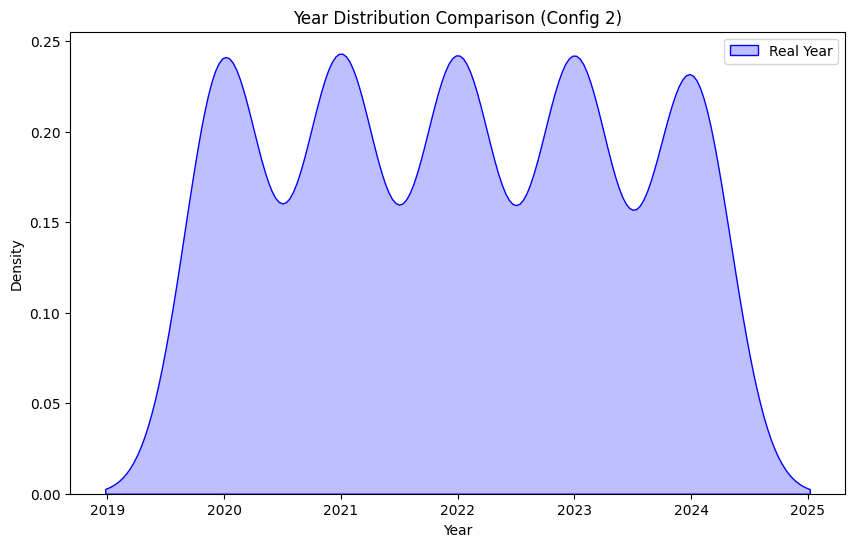

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Year | Real Mean: 2021.98, Real Std: 1.41 | Synthetic Mean: inf, Synthetic Std: 0.00


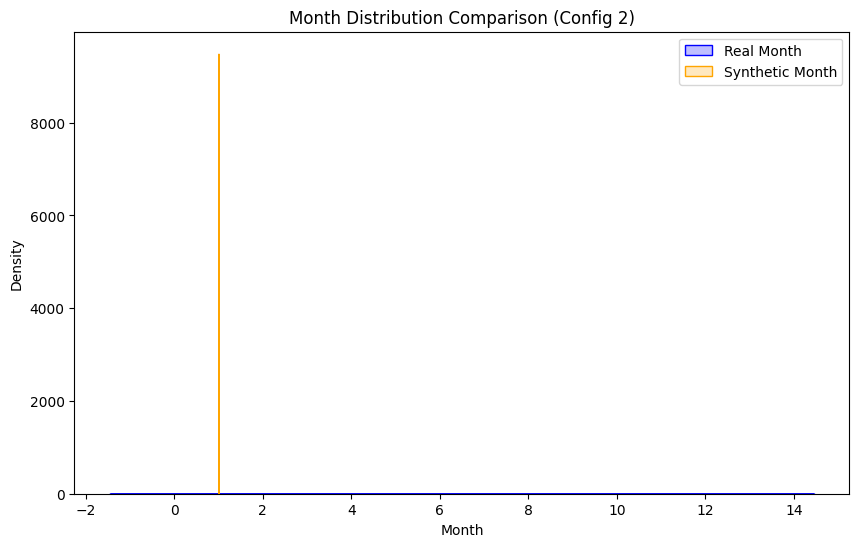

Month | Real Mean: 6.50, Real Std: 3.41 | Synthetic Mean: 1.00, Synthetic Std: 0.00


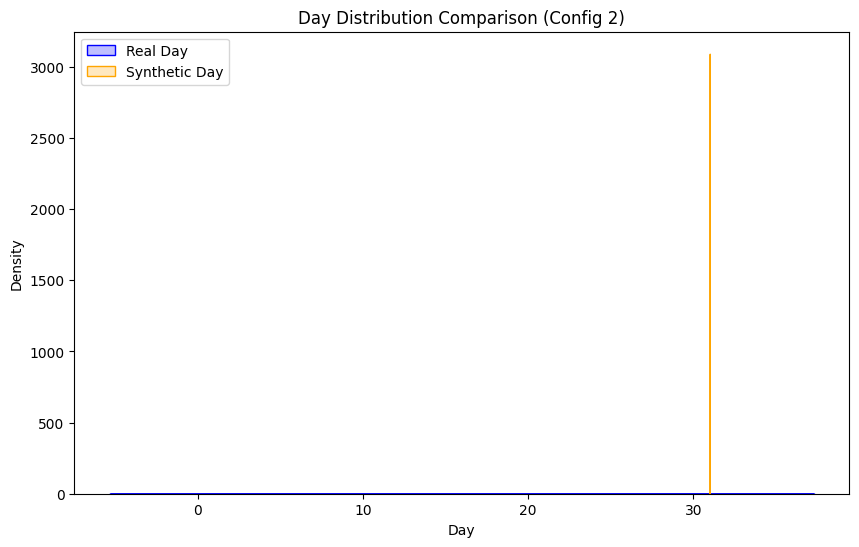

Day | Real Mean: 15.64, Real Std: 8.77 | Synthetic Mean: inf, Synthetic Std: 0.00


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [37]:
# Rename columns in synthetic_df to match those in df
synthetic_df.columns = df.columns

for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], label=f'Real {column}', fill=True, color='blue')
    sns.kdeplot(synthetic_df[column], label=f'Synthetic {column}', fill=True, color='orange')
    plt.title(f'{column} Distribution Comparison (Config 2)')
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

    # Statistical comparison: Mean and Std Deviation
    real_mean = df[column].mean()
    real_std = df[column].std()
    synthetic_mean = synthetic_df[column].mean()
    synthetic_std = synthetic_df[column].std()

    print(f"{column} | Real Mean: {real_mean:.2f}, Real Std: {real_std:.2f} | Synthetic Mean: {synthetic_mean:.2f}, Synthetic Std: {synthetic_std:.2f}")